In [2]:
# Importar librerías necesarias
import pandas as pd

# Especificar la ruta completa del archivo
file_path = r'C:\Users\SM ZONA GAMER\Documents\UNAD\Cuarto Semestre\Otros\Carpeta\Mall_Customers.csv'

# Cargar el dataset
df = pd.read_csv(file_path)

# Mostrar las primeras filas del dataset para verificar la carga
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


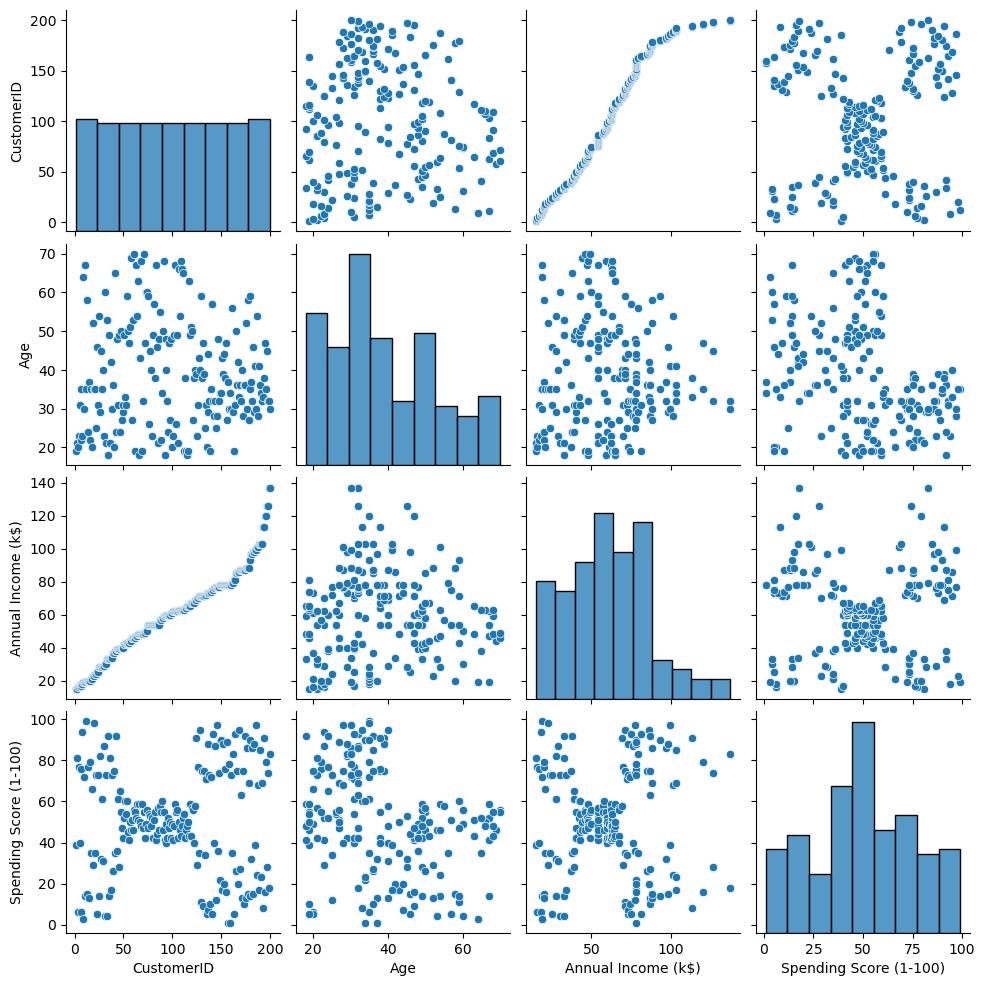

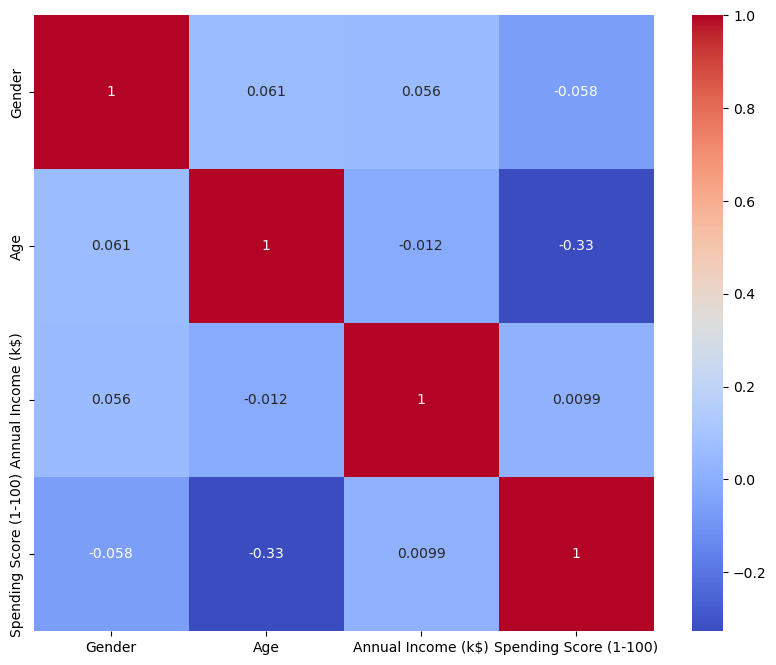

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

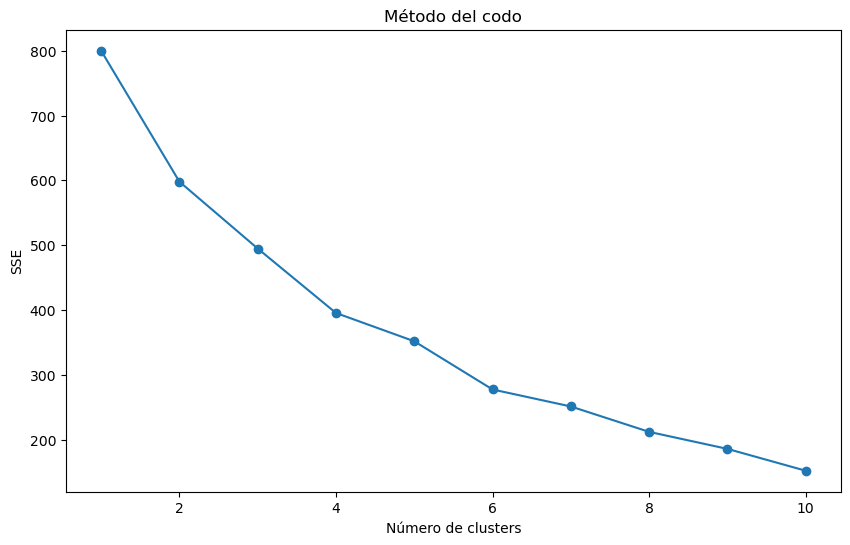

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score: 0.27191023466188324
Calinski-Harabasz Index: 62.12634193286723


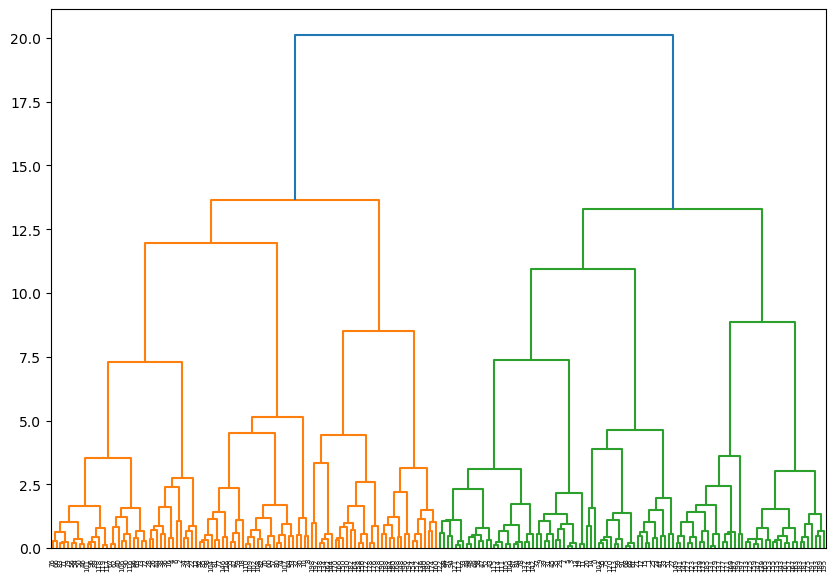

Silhouette Score: 0.28699413201651747
Calinski-Harabasz Index: 64.46870730105833


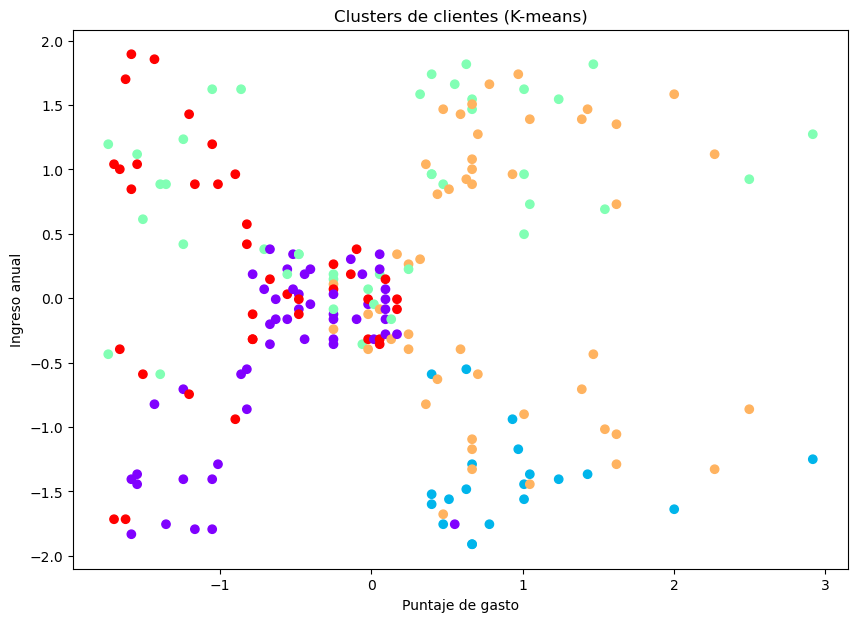

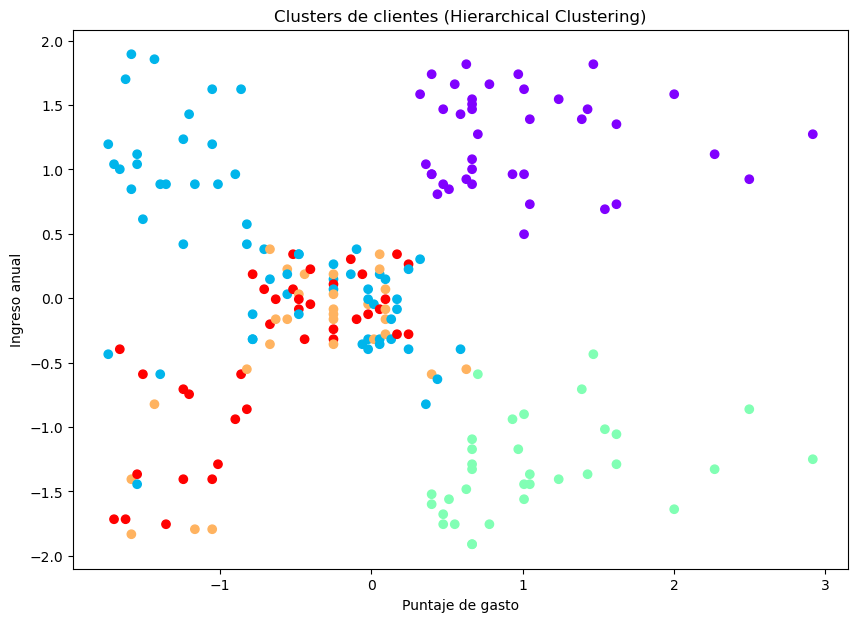

In [26]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler

# Especificar la ruta completa del archivo
file_path = r'C:\Users\SM ZONA GAMER\Documents\UNAD\Cuarto Semestre\Otros\Carpeta\Mall_Customers.csv'

# Cargar el dataset
df = pd.read_csv(file_path)

# Mostrar las primeras filas del dataset
df.head()

# Análisis exploratorio de datos
df.info()
df.describe()

# Visualización de la distribución de las variables
sns.pairplot(df)
plt.show()

# Preprocesamiento de datos
df.isnull().sum()

# Codificar variables categóricas
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

# Escalar las características
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop(['CustomerID'], axis=1))

# Convertir a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=df.columns[1:])

# Análisis de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(df_scaled.corr(), annot=True, cmap='coolwarm')
plt.show()

# Selección de características
X = df_scaled

# K-means Clustering
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Número de clusters')
plt.ylabel('SSE')
plt.title('Método del codo')
plt.show()

kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)
labels_kmeans = kmeans.labels_

silhouette_kmeans = silhouette_score(X, labels_kmeans)
calinski_kmeans = calinski_harabasz_score(X, labels_kmeans)
print(f'Silhouette Score: {silhouette_kmeans}')
print(f'Calinski-Harabasz Index: {calinski_kmeans}')

# Hierarchical Clustering
linked = linkage(X, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.show()

num_clusters = 5
labels_hc = fcluster(linked, num_clusters, criterion='maxclust')

silhouette_hc = silhouette_score(X, labels_hc)
calinski_hc = calinski_harabasz_score(X, labels_hc)
print(f'Silhouette Score: {silhouette_hc}')
print(f'Calinski-Harabasz Index: {calinski_hc}')

# Visualización de resultados
plt.figure(figsize=(10, 7))
plt.scatter(X.iloc[:, 2], X.iloc[:, 3], c=labels_kmeans, cmap='rainbow')
plt.title('Clusters de clientes (K-means)')
plt.xlabel('Puntaje de gasto')
plt.ylabel('Ingreso anual')
plt.show()

plt.figure(figsize=(10, 7))
plt.scatter(X.iloc[:, 2], X.iloc[:, 3], c=labels_hc, cmap='rainbow')
plt.title('Clusters de clientes (Hierarchical Clustering)')
plt.xlabel('Puntaje de gasto')
plt.ylabel('Ingreso anual')
plt.show()


In [36]:
# Selección de características
X = df_scaled

In [ ]:
Trabajo Fase 4 Mariana Lucia Ospina Yara